# A2

In [1]:
# Standard imports
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import importlib
import time

**Uncomment these to use the solution instead of your own implementation**

In [2]:
#from a2_solutions import FeedForward
#from a2_solutions import BackProp
#from a2_solutions import Learn

# Q1: Logistic Function

Your answer here (double-click).

To help you with $\LaTeX$, and to show you my expectations, here is a sample taken from the lecture notes, taken from the 3rd and 4th page of the notes entitled "Error Backpropagation". It has nothing to do with the solution to this question, but just demonstrates some of the features of $\LaTeX$. Notice how I include English statments to guide the reader through the derivation.

<a target=_new href="http://detexify.kirelabs.org/classify.html">This web page</a> is very handy for identifying $\LaTeX$ symbols.

---
More generally, for $\vec{x} \in \mathbb{R}^X$, $\vec{h} \in \mathbb{R}^H$, and $\vec{y} \in \mathbb{R}^Y$.
$$
\begin{align}
\frac{\partial E}{\partial \alpha_i}
  &= \frac{d h_i}{d \alpha_i} \\
  &= \frac{d h_i}{d \alpha_i}
  \left[ M_{1i} \ \cdots \ M_{Yi} \right] \cdot
  \left[ \frac{\partial E}{\partial \beta_1} \ \cdots \ \frac{\partial E}{\partial \beta_Y} \right] \\
  &= \frac{d h_i}{d \alpha_i}
   \left[ M_{1i} \ \cdots \ M_{Yi} \right]
   \left[ \begin{array}{c}
     \frac{\partial E}{\partial \beta_1} \\
     \vdots \\
     \frac{\partial E}{\partial \beta_Y} \end{array} \right]
\end{align}
$$
Thus, for all elements,
$$
\begin{align}
\left[ \begin{array}{c}
  \frac{\partial E}{\partial \alpha_1} \\
  \vdots \\
  \frac{\partial E}{\partial \alpha_H}
\end{array} \right] &=
%
\left[ \begin{array}{c}
  \frac{d h_1}{d \alpha_1} \\
  \vdots \\
  \frac{d h_H}{d \alpha_H}
\end{array} \right]
\odot
\left[ \begin{array}{ccc}
  M_{11} & \cdots & M_{Y1} \\
  \vdots & \ddots & \vdots \\
  M_{1H} & \cdots & M_{YH}
\end{array} \right]
%
\left[ \begin{array}{c}
  \frac{\partial E}{\partial \beta_1} \\
  \vdots \\
  \frac{\partial E}{\partial \beta_Y}
\end{array} \right] \\
%
\frac{\partial E}{\partial \vec{\alpha}} &=
\frac{d \vec{h}}{d \vec{\alpha}} \odot M^\mathrm{T}
\frac{\partial E}{\partial \vec{\beta}}
\end{align}
$$

Q1:

$$
\begin{align}
\sigma(z) &= \frac{1}{1+e^{-z}} = (1+e^{-z})^{-1} \\
\frac{d\sigma(z)}{dz} &= -(1+e^{-z})^{-2}(-e^{-z})\\
&= \frac{1}{1+e^{-z}} \frac{e^{-z}}{1+e^{-z}} \\
\frac{d\sigma(z)}{dz} &= \sigma(z)(1-\sigma(z))
\end{align}
$$

# Q2: Softmax

Your answer here.
$$
\begin{align}
y_k &= \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}, k = 1, ..., K \\
E(\vec{y}, \vec{t}) &= -\sum_{k=1}^{K} t_k\ln(y_k) \\
\end{align}
$$

$$
\begin{align}
\frac{\partial E}{\partial z_j} 
    &= \sum_{k=1}^{K} \left(\frac{\partial E}{\partial y_k} 
        \frac{\partial y_k}{\partial z_j} \right) \\
\frac{\partial E}{\partial y_k} &= -\frac{t_k}{y_k}
\end{align}
$$


$$
\begin{align}
\text{if } k = j: \\
\frac{\partial y_k}{\partial z_j} 
    &= \frac{\partial }{\partial z_j} 
    \left(\frac{e^{z_j}} {e^{z_1}+e^{z_2}+...+e^{z_j}+...+e^{z_K}}\right) \\
\text{let } C &= e^{z_1}+...+e^{z_(j-1)}+e^{z_(j+1)}+...+e^{z_K} \\
\frac{\partial y_k}{\partial z_j} 
    &= \frac{\partial }{\partial z_j} \left(\frac{e^{z_j}} {C+e^{z_j}}\right) \\
    &= \frac{e^{z_j}(C+e^{z_j})-e^{z_j}e^{z_j}}{(C+e^{z_j})^{2}} \\
    &= \frac{e^{z_j}}{C+e^{z_j}}
            - \frac{e^{z_j}e^{z_j}}{(C+e^{z_j})^{2}}\\
    &= \frac{e^{z_j}}{e^{z_1}+e^{z_2}+...+e^{z_K}}
            - \left(\frac{e^{z_j}}{e^{z_1}+e^{z_2}+...+e^{z_K}}\right)^{2} \\
\frac{\partial y_k}{\partial z_j} &= y_k(1-y_k)
\end{align}
$$


$$
\begin{align}
\text{if } k \ne j: \\
\frac{\partial y_k}{\partial z_j} 
    &= \frac{\partial }{\partial z_j} 
    \left(\frac{e^{z_k}} {e^{z_1}+e^{z_2}+...+e^{z_j}+...+e^{z_K}}\right) \\
\text{let } C &= e^{z_1}+...+e^{z_(j-1)}+e^{z_(j+1)}+...+e^{z_K} \\
\frac{\partial y_k}{\partial z_j} 
    &= e^{z_k}\frac{\partial }{\partial z_j} \left(\frac{1} {C+e^{z_j}}\right) \\
    &= e^{z_k}\frac{\partial }{\partial z_j} (C+e^{z_j})^{-1} \\
    &= -e^{z_k}e^{z_j}(C+e^{z_j})^{-2} \\
\frac{\partial y_k}{\partial z_j} &= -\frac{e^{z_k}}{e^{z_1}+e^{z_2}+...+e^{z_K}}
    \frac{e^{z_j}}{e^{z_1}+e^{z_2}+...+e^{z_K}} \\
\frac{\partial y_k}{\partial z_j} &= -y_k y_j
\end{align}
$$

$$
\begin{align}
&\text{Let}\ \delta_{jk} \text{ be the Kronecker delta} \\
&\delta_{jk} = 
    \begin{cases}
      0 & \text{if}\ j \ne k \\
      1 & \text{if}\ j = k \\
    \end{cases} \\
&\text{Thus, for}\ k = 1, ..., K \\
&\frac{\partial y_k}{\partial z_j} = y_k(\delta_{jk}-y_j) \\
&\text{Therefore,} \\
&\frac{\partial E}{\partial z_j} 
    = \sum_{k=1}^{K} \left(\frac{\partial E}{\partial y_k} 
        \frac{\partial y_k}{\partial z_j} \right)
    = \sum_{k=1}^{K} \left(-\frac{t_k}{y_k}\right) \left(y_k(\delta_{jk}-y_j)\right) \\
&\frac{\partial E}{\partial z_j} = \sum_{k=1}^{K} t_k(y_j-\delta_{jk})
\end{align}
$$

# Q3: Top-Layer Error Gradients

Your answer here.

a)
$$
\begin{align}
E(y, t) &= -t\ln(y) - (1-t)\ln(1-y) \\
\frac{\partial E}{\partial y} &= \frac{-t}{y} + \frac{1-t}{1-y} = \frac{-t(1-y)+y(1-t)}{y(1-y)} \\
\frac{\partial E}{\partial y} &= \frac{y-t}{y(1-y)} \\
y &= \sigma(z) = \frac{1}{1+e^{-z}} \\
\frac{dy}{dz} &= y(1-y) \\
\frac{\partial E}{\partial z} &= \frac{\partial E}{\partial y}\frac{dy}{dz} 
    = \left(\frac{y-t}{y(1-y)} \right) \left(y(1-y) \right) \\
\frac{\partial E}{\partial z} &= y-t
\end{align}
$$

b)
$$
\begin{align}
E(y, t) &= \frac{1}{2}(y-t)^{2} \\
\frac{\partial E}{\partial y} &= (y-t) \\
y &= \sigma(z) = z \\
\frac{dy}{dz} &= 1 \\
\frac{\partial E}{\partial z} &= \frac{\partial E}{\partial y}\frac{dy}{dz} 
    = (y-t)(1) \\
\frac{\partial E}{\partial z} &= y-t
\end{align}
$$


# Q4: Implementing Backprop

## Supplied Helper Functions

In [3]:
# Supplied functions

def NSamples(x):
    '''
        n = NSamples(x)
        
        Returns the number of samples in a batch of inputs.
        
        Input:
         x   is a 2D array
        
        Output:
         n   is an integer
    '''
    return len(x)

def OneHot(z):
    '''
        y = OneHot(z)

        Applies the one-hot function to the vectors in z.
        Example:
          OneHot([[0.9, 0.1], [-0.5, 0.1]])
          returns np.array([[1,0],[0,1]])

        Input:
         z    is a 2D array of samples

        Output:
         y    is an array the same shape as z
    '''
    y = []
    # Locate the max of each row
    for zz in z:
        idx = np.argmax(zz)
        b = np.zeros_like(zz)
        b[idx] = 1.
        y.append(b)
    y = np.array(y)
    return y

## 4(a)

In [4]:
# Grading:
# [1] Divide each by NSamples(t) or NSamples(y) to get the mean
# Plus one mark for each of the 4 formulas, as indicated below.
def CrossEntropy(y, t):
    '''
        E = CrossEntropy(y, t)

        Evaluates the mean cross entropy loss between outputs y and targets t.

        Inputs:
          y is an array holding the network outputs
          t is an array holding the corresponding targets

        Outputs:
          E is the mean CE
    '''
    
    # === YOUR CODE HERE ===

    num_of_samples = NSamples(y)
    total_ce = -np.sum(t*np.log(y) + (1-t)*np.log(1-y))
    return total_ce/num_of_samples

def gradCrossEntropy(y, t):
    '''
        E = gradCrossEntropy(y, t)

        Given targets t, evaluates the gradient of the mean cross entropy loss
        with respect to the output y.

        Inputs:
          y is the array holding the network's output
          t is an array holding the corresponding targets

        Outputs:
          dEdy (vector) is the gradients of CE with respect to output y
    '''
    
    # === YOUR CODE HERE ===

    return ((y-t)/(y*(1-y)))/NSamples(y)

def MSE(y, t):
    '''
        E = MSE(y, t)

        Evaluates the mean squared error loss between outputs y and targets t.

        Inputs:
          y is the array holding the network's output
          t is an array holding the corresponding targets

        Outputs:
          E is the MSE
    '''
    
    # === YOUR CODE HERE ===
    
    num_of_samples = NSamples(y)
    total_se = np.sum(((y-t)**2)/2)
    return total_se/num_of_samples

def gradMSE(y, t):
    '''
        E = gradMSE(y, t)

        Given targets t, evaluates the gradient of the mean squared error loss
        with respect to the output y.

        Inputs:
          y is the array holding the network's output
          t is an array holding the corresponding targets

        Outputs:
          dEdy (vector) is the gradients of MSE with respect to output y
    '''
    
    # === YOUR CODE HERE ===

    return (y-t)/NSamples(y)


#================================================================
#
#  UNCOMMENT THE CORRESPONDING LINES BELOW IF YOU WANT TO USE
#  THE SOLUTIONS INSTEAD OF YOUR VERSION.
#
#================================================================
#from a2_solutions import CrossEntropy
#from a2_solutions import gradCrossEntropy
#from a2_solutions import MSE
#from a2_solutions import gradMSE

## Layer Class

In [5]:
class Layer():
    
    def __init__(self, n_nodes, act='logistic'):
        '''
            lyr = Layer(n_nodes, act='logistic')
            
            Creates a layer object.
            
            Inputs:
             n_nodes  the number of nodes in the layer
             act      specifies the activation function
                      Use 'logistic' or 'identity'
        '''
        self.N = n_nodes  # number of nodes in this layer
        self.h = []       # node activities
        self.z = []
        self.b = np.zeros(self.N)  # biases
        
        # Activation functions
        self.sigma = self.Logistic
        self.sigma_p = (lambda : self.Logistic_p())
        if act=='identity':
            self.sigma = self.Identity
            self.sigma_p = (lambda : self.Identity_p())
       
    def Logistic(self):
        return 1. / (1. + np.exp(-self.z))
    def Logistic_p(self):
        return self.h * (1.-self.h)
    def Identity(self):
        return self.z
    def Identity_p(self):
        return np.ones_like(self.h)


## 4(b,c,d) Network Class

In [6]:
class Network():

    
    def FeedForward(self, x):
        '''
            y = net.FeedForward(x)

            Runs the network forward, starting with x as input.
            Returns the activity of the output layer.

            All node use 
            Note: The activation function used for the output layer
            depends on what self.Loss is set to.
        '''
        try: FeedForward
        except NameError:
            
            #========= YOUR IMPLEMENTATION BELOW =========

            x = np.array(x)  # Convert input to array, in case it's not

            # === YOUR CODE HERE ===
            self.lyr[0].h = x
            for curr_L_idx in range(1, self.n_layers):
                curr_layer = self.lyr[curr_L_idx]
                curr_layer.z = self.lyr[curr_L_idx-1].h@self.W[curr_L_idx-1] + curr_layer.b
                curr_layer.h = curr_layer.sigma()
            y = self.lyr[-1].h
            return y
        
            #========= YOUR IMPLEMENTATION ABOVE =========
                        
        else:
            return FeedForward(self, x)

    
    def BackProp(self, t, lrate=0.05):
        '''
            net.BackProp(targets, lrate=0.05)
            
            Given the current network state and targets t, updates the connection
            weights and biases using the backpropagation algorithm.
            
            Inputs:
             t      an array of targets (number of samples must match the
                    network's output)
             lrate  learning rate
        '''
        #====== REMOVE BELOW IF YOU DON'T PLAN TO USE THE SOLUTIONS ======
        try: BackProp
        except NameError:
            
            #========= YOUR IMPLEMENTATION BELOW =========
            
            t = np.array(t)  # convert t to an array, in case it's not

            # === YOUR CODE HERE ===
            
            dEdz = self.gradLoss(self.lyr[-1].h, t) * self.lyr[-1].sigma_p()
            
            for curr_L_idx in range(self.n_layers-2, -1, -1):  # 3 layers, curr_L_idx = 1, 0

                dzdW = self.lyr[curr_L_idx].h
                dEdW = dzdW.T @ dEdz
                
                self.W[curr_L_idx] -= lrate*dEdW             
                self.lyr[curr_L_idx+1].b -= lrate*(np.sum(dEdz, axis=0))
                
                dEdz = self.lyr[curr_L_idx].sigma_p() * (dEdz @ self.W[curr_L_idx].T)

            #========= YOUR IMPLEMENTATION ABOVE =========

        else:
            BackProp(self, t, lrate)

            
    def Learn(self, inputs, targets, lrate=0.05, epochs=1, progress=True):
        '''
            Network.Learn(data, lrate=0.05, epochs=1, progress=True)

            Run through the dataset 'epochs' number of times, incrementing the
            network weights after each epoch.

            Inputs:
              data is a list of 2 arrays, one for inputs, and one for targets
              lrate is the learning rate (try 0.001 to 0.5)
              epochs is the number of times to go through the training data
              progress (Boolean) indicates whether to show cost
        '''
        try: Learn
        except NameError:
            
            #========= YOUR IMPLEMENTATION BELOW =========

            # === YOUR CODE HERE ===
            
            if progress:
                for num_of_times in range(epochs):
                    y = self.FeedForward(inputs)
                    self.cost_history.append(self.Loss(y, targets))
                    self.BackProp(targets, lrate)
            else:
                for num_of_times in range(epochs):
                    y = self.FeedForward(inputs)
                    self.BackProp(targets, lrate)
            
            #========= YOUR IMPLEMENTATION ABOVE =========

        else:
            Learn(self, inputs, targets, lrate=lrate, epochs=epochs, progress=progress)
    
    
    def __init__(self, sizes, type='classifier'):
        '''
            net = Network(sizes, type='classifier')

            Creates a Network and saves it in the variable 'net'.

            Inputs:
              sizes is a list of integers specifying the number
                  of nodes in each layer
                  eg. [5, 20, 3] will create a 3-layer network
                      with 5 input, 20 hidden, and 3 output nodes
              type can be either 'classifier' or 'regression', and
                  sets the activation function on the output layer,
                  as well as the loss function.
                  'classifier': logistic, cross entropy
                  'regression': linear, mean squared error
        '''
        self.n_layers = len(sizes)
        self.lyr = []    # a list of Layers
        self.W = []      # Weight matrices, indexed by the layer below it
        
        self.cost_history = []  # keeps track of the cost as learning progresses
        
        # Two common types of networks
        # The member variable self.Loss refers to one of the implemented
        # loss functions: MSE, or CrossEntropy.
        # Call it using self.Loss(t)
        if type=='classifier':
            self.classifier = True
            self.Loss = CrossEntropy
            self.gradLoss = gradCrossEntropy
            activation = 'logistic'
        else:
            self.classifier = False
            self.Loss = MSE
            self.gradLoss = gradMSE
            activation = 'identity'

        # Create and add Layers (using logistic for hidden layers)
        for n in sizes[:-1]:
            self.lyr.append( Layer(n) )
   
        # For the top layer, we use the appropriate activtaion function
        self.lyr.append( Layer(sizes[-1], act=activation) )
    
        # Randomly initialize weight matrices
        for idx in range(self.n_layers-1):
            m = self.lyr[idx].N
            n = self.lyr[idx+1].N
            temp = np.random.normal(size=[m,n])/np.sqrt(m)
            self.W.append(temp)

    def Evaluate(self, inputs, targets):
        '''
            E = net.Evaluate(data)

            Computes the average loss over the supplied dataset.

            Inputs
             inputs  is an array of inputs
             targets is a list of corresponding targets

            Outputs
             E is a scalar, the average loss
        '''
        y = self.FeedForward(inputs)
        return self.Loss(y, targets)

    def ClassificationAccuracy(self, inputs, targets):
        '''
            a = net.ClassificationAccuracy(data)
            
            Returns the fraction (between 0 and 1) of correct one-hot classifications
            in the dataset.
        '''
        y = self.FeedForward(inputs)
        yb = OneHot(y)
        n_incorrect = np.sum(yb!=targets) / 2.
        return 1. - float(n_incorrect) / NSamples(inputs)

# Classification

## Create a Classification Dataset

In [7]:
# 5 Classes in 8-Dimensional Space
np.random.seed(15)
noise = 0.1
InputClasses = np.array([[1,0,1,0,0,1,1,0],
                         [0,1,0,1,0,1,0,1],
                         [0,1,1,0,1,0,0,1],
                         [1,0,0,0,1,0,1,1],
                         [1,0,0,1,0,1,0,1]], dtype=float)
OutputClasses = np.array([[1,0,0,0,0],
                          [0,1,0,0,0],
                          [0,0,1,0,0],
                          [0,0,0,1,0],
                          [0,0,0,0,1]], dtype=float)
n_input = np.shape(InputClasses)[1]
n_output = np.shape(OutputClasses)[1]
n_classes = np.shape(InputClasses)[0]

# Create a training dataset
n_samples = 100
training_output = []
training_input = []
for idx in range(n_samples):
    k = np.random.randint(n_classes)
    x = InputClasses[k,:] + np.random.normal(size=n_input)*noise
    t = OutputClasses[k,:]
    training_input.append(x)
    training_output.append(t)

# Create a test dataset
n_samples = 100
test_output = []
test_input = []
for idx in range(n_samples):
    k = np.random.randint(n_classes)
    x = InputClasses[k,:] + np.random.normal(size=n_input)*noise
    t = OutputClasses[k,:]
    test_input.append(x)
    test_output.append(t)

train = [np.array(training_input), np.array(training_output)]
test = [np.array(test_input), np.array(test_output)]

## Neural Network Model

In [8]:
# Create a Network
net = Network([n_input, 18, n_output], type='classifier')

In [9]:
CE = net.Evaluate(train[0], train[1])

In [10]:
# Evaluate it before training
CE = net.Evaluate(train[0], train[1])
accuracy = net.ClassificationAccuracy(train[0], train[1])
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Cross Entropy = 3.6170513253334455
     Accuracy = 26.0%


In [11]:
net.Learn(train[0], train[1], epochs=500, lrate=1.)

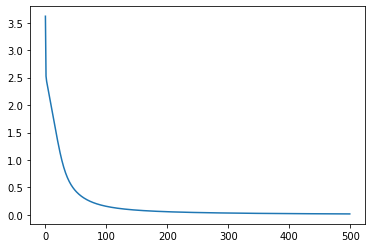

In [12]:
plt.plot(net.cost_history);

## Evaluate it After Training

In [13]:
print('Training Set')
CE = net.Evaluate(train[0], train[1])
accuracy = net.ClassificationAccuracy(train[0], train[1])
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Training Set
Cross Entropy = 0.01772892214659398
     Accuracy = 100.0%


In [14]:
print('Test Set')
CE = net.Evaluate(test[0], test[1])
accuracy = net.ClassificationAccuracy(test[0], test[1])
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Test Set
Cross Entropy = 0.019034434339180086
     Accuracy = 100.0%


In [15]:
p = np.random.randint(len(test[0]))
print(net.FeedForward(test[0][p]))
print(test[1][p])

[6.80460153e-05 9.82820589e-01 1.25867053e-02 1.42467669e-04
 2.43266157e-03]
[0. 1. 0. 0. 0.]


# Regression

## Create a Regression Dataset

In [16]:
# 1D -> 1D (linear mapping)
np.random.seed(846)
n_input = 1
n_output = 1
slope = np.random.rand() - 0.5
intercept = np.random.rand()*2. - 1.

def myfunc(x):
    return slope*x+intercept

# Create a training dataset
n_samples = 200
training_output = []
training_input = []
xv = np.linspace(-1, 1, n_samples)
for idx in range(n_samples):
    #x = np.random.rand()*2. - 1.
    x = xv[idx]
    t = myfunc(x) + np.random.normal(scale=0.1)
    training_input.append(np.array([x]))
    training_output.append(np.array([t]))

# Create a testing dataset
n_samples = 50
test_input = []
test_output = []
xv = np.linspace(-1, 1, n_samples)
for idx in range(n_samples):
    #x = np.random.rand()*2. - 1.
    x = xv[idx] + np.random.normal(scale=0.1)
    t = myfunc(x) + np.random.normal(scale=0.1)
    test_input.append(np.array([x]))
    test_output.append(np.array([t]))

# Create a perfect dataset
n_samples = 100
perfect_input = []
perfect_output = []
xv = np.linspace(-1, 1, n_samples)
for idx in range(n_samples):
    #x = np.random.rand()*2. - 1.
    x = xv[idx]
    t = myfunc(x)
    perfect_input.append(np.array([x]))
    perfect_output.append(np.array([t]))
    
train = [np.array(training_input), np.array(training_output)]
test = [np.array(test_input), np.array(test_output)]
perfect = [np.array(perfect_input), np.array(perfect_output)]

## Neural Network Model

In [17]:
net = Network([1, 10, 1], type='regression')

In [18]:
# Evaluate it before training
mse = net.Evaluate(train[0], train[1])
print('MSE = '+str(mse))

MSE = 0.17876598078770747


## Training

In [19]:
net.Learn(train[0], train[1], epochs=300)

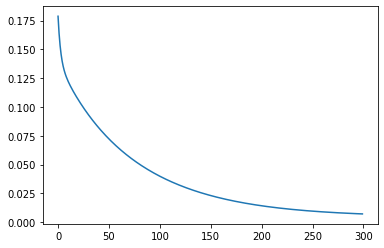

In [20]:
plt.plot(net.cost_history);

## Evaluate it After Training

In [21]:
# On training dataset
mse = net.Evaluate(train[0], train[1])
print('Training MSE = '+str(mse))

Training MSE = 0.007055603695944581


In [22]:
# On test dataset
mse = net.Evaluate(test[0], test[1])
print('Test MSE = '+str(mse))

Test MSE = 0.008640757130780328


In [23]:
# Evaluate our model and the TRUE solution (since we know it)
s = np.linspace(-1, 1, 200)
y = net.FeedForward(np.array([s]).T)
p = [myfunc(x) for x in s]

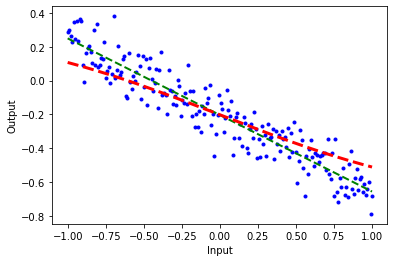

In [24]:
# Plot the training data,
# as well as out model and the true model
plt.plot(training_input, training_output, 'b.')
plt.plot(s,p, 'g--', linewidth=2)
plt.plot(s,y, 'r--', linewidth=3)
plt.xlabel('Input')
plt.ylabel('Output');